In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data[:, :2])  # Use 2 features for simplicity
y = data.target.reshape(-1, 1)

In [3]:

n_hidden = 4
W1 = np.random.randn(2, n_hidden) * 0.01
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, 1) * 0.01
b2 = np.zeros((1, 1))
losses = []

In [4]:

def relu(x): return np.maximum(0, x)
def sigmoid(x): return 1 / (1 + np.exp(-x))

In [5]:

for epoch in range(50):

    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)
    
    loss = -np.mean(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
    losses.append(loss)
    
    dL_dy_pred = (y_pred - y) / (y_pred * (1 - y_pred))
    dy_pred_dz2 = y_pred * (1 - y_pred)
    dz2_da1 = W2.T
    da1_dz1 = (z1 > 0).astype(float)
    
    dL_dW2 = np.dot(a1.T, dL_dy_pred * dy_pred_dz2)
    dL_db2 = np.sum(dL_dy_pred * dy_pred_dz2, axis=0)
    dL_dW1 = np.dot(X.T, np.dot(dL_dy_pred * dy_pred_dz2, W2.T) * da1_dz1)
    dL_db1 = np.sum(np.dot(dL_dy_pred * dy_pred_dz2, W2.T) * da1_dz1, axis=0)

    lr = 0.1
    W1 -= lr * dL_dW1
    b1 -= lr * dL_db1
    W2 -= lr * dL_dW2
    b2 -= lr * dL_db2

C:\Users\HP\AppData\Local\Temp\ipykernel_14156\3730501270.py:8: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
C:\Users\HP\AppData\Local\Temp\ipykernel_14156\3730501270.py:11: RuntimeWarning: divide by zero encountered in divide
  dL_dy_pred = (y_pred - y) / (y_pred * (1 - y_pred))
C:\Users\HP\AppData\Local\Temp\ipykernel_14156\3730501270.py:16: RuntimeWarning: invalid value encountered in multiply
  dL_dW2 = np.dot(a1.T, dL_dy_pred * dy_pred_dz2)
C:\Users\HP\AppData\Local\Temp\ipykernel_14156\3730501270.py:17: RuntimeWarning: invalid value encountered in multiply
  dL_db2 = np.sum(dL_dy_pred * dy_pred_dz2, axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_14156\3730501270.py:18: RuntimeWarning: invalid value encountered in multiply
  dL_dW1 = np.dot(X.T, np.dot(dL_dy_pred * dy_pred_dz2, W2.T) * da1_dz1)
C:\Users\HP\AppData\Local\Temp\ipykernel_14156\3730501270.py:19: RuntimeWarning: invalid value encountered in multipl

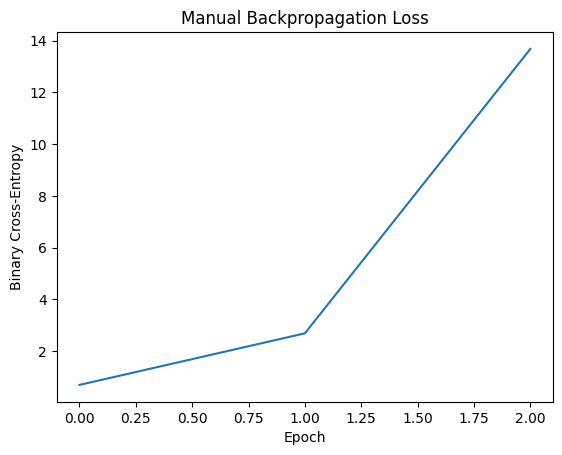

In [6]:

plt.plot(losses)
plt.title('Manual Backpropagation Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy')
plt.show()

In [7]:

print("Challenge: Manual backprop requires careful tracking")
print("of derivatives through each operation, which is error-prone")
print("for complex architectures.")

Challenge: Manual backprop requires careful tracking
of derivatives through each operation, which is error-prone
for complex architectures.
